<a href="https://colab.research.google.com/github/RevazRevazashvili/TSU-python-labs/blob/main/Lab_007_Parallel_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

გამოსადეგი ბმულები
1. https://docs.python.org/3/library/threading.html

#პარალელური პროგრამირება: პროცესები და thread-ები

thread

In [ ]:
"""
პროგრამული კოდი შედგება ინსტრუქციების მიმდევრობისგან. დროის გარკვეულ შუალედში
შესასრულებელი ინსტრუქციების ნაკრები შეიძლება დაიყოს ურთიერ დამოუკიდებელ და
ურთიერთქმედ ინსტრუქციებად. (ორ ან მეტ ინსტრუქციას ეწოდება ურთიერთ დამოუკიდებელი
თუ თითოეული მათგანის შესრულება არანაირ ზეგავლენას არ ახდენს სხვა დანარჩენი
ინსტრუქციების შესრულება. წინააღმდეგ შემთხვევაში ინსტრუქციებს ეწოდებათ ურთიერთქმედი.
მაგალითად, ინსტრუქციები a = 3 + 5 და b = 5 * 8 ურთიერთ დამოუკიდებელია, ხოლო
ინსტრუქციები a = 3 + 5 და b = 5 * a - კი არა.) თანამედროვე კომპიუტერების გამოთვლითი
შესაძლებლობებიდან გამომდინარე ურთიერთ დამოუკიდებელი ინსტრუქციები შეიძლება
შესრულდეს პარალელურად, რაც გამოიწვევს კოდის შესრულებას შესაბამის ფრაგმენტზე. კოდის
ურთიერთდამოუკიდებელი ინსტრუქციების პარალელური შესრულება შესაძლებელია
უზრუნველვყოთ thread-ების გამოყენებით.
პროგრამულ კოდში გამოყენებულ thread-ებს შეუძლიათ ერთობლივად გამოიყენონ
პროგრამის მონაცემები და რესურსები (ცვლადები, ფუნქციები და ა.შ.). ყოველ thread-ს პროცესის
მსგავსად გააჩნია საკუთარი ბრძანებათა მთვლელი, რეგისტრი და სტეკი. thread-ი დროის
ნებისმიერ მომენტში იმყოფება შემდეგი მდგომარეობებიდან ერთერთში (ნახ. 8.1):
• Ready (მზადყოფნა) - მდგომარეობა, რომელშიც გადადის სისტემაში გამოჩენილი thread-ი;
• Running (შესრულება) - მდგომარეობა, როდესაც thread-ი სრულდება პროცესორზე;
• Blocked (ბლოკირებული) - მდგომარეობა, რომლის დროსაც thread-ს არ შეუძლია შესრულება
გარკვეული რესურსის საჭიროების გამო, რომელიც სისტემაში არაა ხელმისაწვდომი.
"""

thread-ის შექმნა

In [ ]:
# thread-ის შექმნის მიზანს წარმოადგენს გარკვეულ მეთოდის შესრულება. განვსაზღვროთ მეთოდი, რომლის შესრულებისთვის შევქმნით thread-ს. შევქმნათ მეთოდი, რომელიც დაბეჭდავს
# პარამეტრად გადაცემულ ტექსტს.

import threading

def thrFunc(st):
  print(f"there was called thread: {st}")

t1 = threading.Thread(target=thrFunc, args=("thread-1",))
t2 = threading.Thread(target=thrFunc, args=("thread-2",))
t1.start()
t2.start()

there was called thread: thread-1
there was called thread: thread-2


#thread კლასის მეთოდები

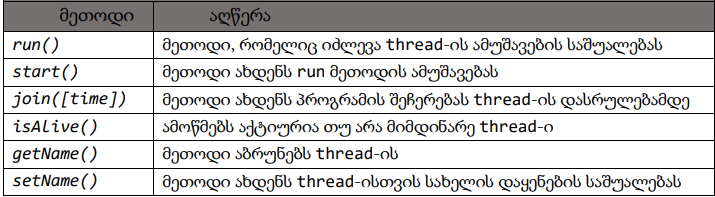

In [ ]:
"""
thread-მა რომ განახორციელოს საკუთარი დანიშნულება აუცილებელია მისი შექმნის შემდეგ
მან გამოიძახოს მეთოდი start(), ხოლო იმისათვის, რომ პროგრამამ მასში განსაზღვრულ
threadზე ადრე არ დაასრულოს საქმიანობა საჭიროა ის დაელოდოს ამუშავებული thread-ის დასრულებას
რისთვისაც thread-მა უნდა გამოიძახოს მეთოდი join().
მაშასადამე, წინა პუნქტში განსაზღვრული thread-ების ნორმალური საქმიანობის
უზრუნველსაყოფად საჭიროა კოდის შევსება შემდეგი კოდის ფრაგმენტით:
t1.start()
t1.join()
t2.start()
t2.join()
"""

thread-ის გამოყენება გამოთვლებში

In [ ]:
# data ფაილში რიცხვების ჩაწერა შემდგომი გამოთვლებისთვის

with open("data.txt", "a") as f:
  for i in range(100):
    f.write(f"{str(i)} ")
    if i%10==0:
      f.write("\n")

In [ ]:
import random as rd
import time
import threading as th
from multiprocessing import Process

N = 1000000
Row = 10
a, b = 0, 100

with open('data.txt', 'w', encoding='utf-8') as file:
    for _ in range(Row):
        st = ' '.join([str(rd.randint(a, b)) for _ in range(N)]) + "\n"
        file.write(st)

def th_func(numbers, N):
    avg = sum([int(n) for n in numbers.split()]) / N
    print(f"average = {avg}")

with open('data.txt', 'r', encoding='utf-8') as file:
    arr = [ar.strip() for ar in file.readlines()]

# THREADING
threads = []
start = time.time()
for ob in arr:
    t = th.Thread(target=th_func, args=(ob, N))
    t.start()
    threads.append(t)

for t in threads:   # ✅ Wait for all to finish
    t.join()
end = time.time()
print("Threads total time:", round(end - start, 2))

# MULTIPROCESSING
processes = []
start = time.time()
for ob in arr:
    p = Process(target=th_func, args=(ob, N))
    p.start()
    processes.append(p)

for p in processes:  # ✅ Wait for all to finish
    p.join()
end = time.time()
print("Processes total time:", round(end - start, 2))

# SEQUENTIAL
start = time.time()
for st in arr:
    th_func(st, N)
end = time.time()
print("Sequential total time:", round(end - start, 2))


average = 50.012261average = 49.968073

average = 49.982743
average = 49.989837
average = 50.023654
average = 49.985376
average = 49.997315
average = 49.983054
average = 49.983925
average = 49.997785
Threads total time: 2.4
average = 49.982743
average = 50.012261
average = 49.989837
average = 49.997315average = 49.968073

average = 50.023654
average = 49.985376
average = 49.997785
average = 49.983925
average = 49.983054
Processes total time: 2.29
average = 49.982743
average = 49.997315
average = 49.968073
average = 50.012261
average = 49.989837
average = 49.985376
average = 50.023654
average = 49.983925
average = 49.997785
average = 49.983054
Sequential total time: 1.75


Threading (I/O-bound example)

In [ ]:
import threading
import time

def download(name):
    print(f"Starting {name}")
    time.sleep(3)
    print(f"Finished {name}")

start = time.time()
threads = []
for i in range(5):
    t = threading.Thread(target=download, args=(f"task-{i}",))
    t.start()
    threads.append(t)

for t in threads:
    t.join()

# print("Total time:", round(time.time() - start, 2))
# t1 = time.time()
# for i in range(5):
#     download(f"task-{i}")
# print("Total time:", round(time.time() - t1, 2))


Starting task-0
Starting task-1
Starting task-2
Starting task-3
Starting task-4
Finished task-0
Finished task-1
Finished task-2
Finished task-3
Finished task-4


Multiprocessing (CPU-bound example)

In [37]:
from multiprocessing import Pool
import math, time

def intensive(n):
    return sum(math.sqrt(i**3) for i in range(n))

start = time.time()
with Pool(4) as p:
    results = p.map(intensive, [1000000]*4)
print("Processes Total time:", round(time.time() - start, 2))
start = time.time()
for _ in range(4):
    intensive(1000000)
print("Sequential Total time:", round(time.time() - start, 2))


Processes Total time: 1.21
[399999500000125.0, 399999500000125.0, 399999500000125.0, 399999500000125.0]
Sequential Total time: 1.05


thread-ების სინქრონიზაცია

In [ ]:
"""
პროგრამულ კოდში thread-ბის გამოყენებას არ შეიძლება ჰქონდეს უარყოფითი ეფექტი, თუ
thread-ები იყენებენ საერთო მეხსიერებას მხოლოდ კითხვის შესაძლებლობით. პრობლემა
წარმოიშობა იმ შემთხვევაში, როდესაც საერთო მეხსიერებაში საჭიროა მნიშვნელობის შეცვლა.
thread-ების მიერ გამოყენებულ საერთო მეხსიერებას კრიტიკული სექცია ეწოდება. რამდენიმე
thread-ის მიერ კრიტიკულ სექციაზე მიმართვისას შეიძლება წარმოიშვას სიტუაცია, რომლის
დროსაც ყველა thread-ის მიერ მნიშვნელობის შეცვლის მცდელობის შემთხვევაში მოხდა მხოლოდ
„ბოლოს“ შესრულებული thread-ის მიერ განხორციელებული ცვლილების შენახვა. ამ სიტუაციას
შეჯიბრის მდგომარეობა ეწოდება.
"""

In [ ]:
import threading

counter = 0

def increment(): # ფუნქცია გლობალური ცვლადის ინკრემენტაციისთვის
    global counter
    for _ in range(1000000):
        counter += 1

t1 = threading.Thread(target=increment)
t2 = threading.Thread(target=increment)

t1.start() # პირველი thread იწყებს მუშაობას
t2.start() # მეორე thread იწყებს მუშაობას
t1.join() # პირველი thread ჯოინდება
t2.join() # მეორე thread ჯოინდება

print("Final counter:", counter) # არ არის გარანტირებული რომ შედეგი იქნება 2000000


Final counter: 2000000


In [ ]:
"""
წარმოქმნილი სიტუაციიდან გამოსავალს წარმოადგენს thread-ების მიმართ სინქრონიზაციის
მექანიზმის გამოყენება. Python ენაში ამ მიზნით განსაზღვრულია რამდენიმე შესაძლებლობა. ჩვენ
განვიხილავთ სინქრონიზაციის Lock და RLock მექანიზმს. Lock მექანიზმი მცირე რაოდენობის
სამუშაოს შემთხვევაში არ ქმნის პრობლემას, მაგრამ უფრო მასშტაბური სამუშაოების შემთხვევაში
კი შეიძლება წარმოიშვას გარკვეული პრობლემები. ასეთ შემთხვევაში შეიძლება გამოყენებული
RLock მექანიზმი. ორივე მექანიზმში განსაზღვრულია ერთიდაიმავე სახელის მქონე ორი მეთოდი:
1.acquire() - რომელიც ახდენს კრიტიკული სექციის ჩაკეტვას, როცა მიმდინარე thread-ი
ახდენს შესაბამისი ცვლადის მნიშვნელობის შეცვლას. მეთოდის გამოყენება უნდა მოხდეს
უშუალოდ შესაბამის ცვლადზე ცვლილების განხორციელებამდე;
2.release() - რომელიც მიმდინარე thread-ის მხრიდან კრიტიკულ სექციაზე შესაბამისი
ცვლილების განხორციელების შემდეგ ხელმისაწვდომს ხდის კრიტიკულ სექციას. მეთოდის
გამოყენება უნდა მოხდეს უშუალოდ შესაბამის ცვლადზე ცვლილების განხორციელების
შემდეგ;
"""

In [ ]:
!pip install threading

In [ ]:
import threading

counter = 0
lock = threading.Lock() # კრიტიკული სექციის ჩამკეტ-გამხსნელი

def increment():
    global counter
    for _ in range(1000000):
        with lock:          # acquire() and release() automatically
            counter += 1

t1 = threading.Thread(target=increment)
t2 = threading.Thread(target=increment)

t1.start()
t2.start()
t1.join()
t2.join()

print("Final counter:", counter)


Multiprocessing

In [ ]:
from multiprocessing import Process, current_process

def myFunc():
   print(f'There was called process:')
   print(f'\tprocess name: {current_process().name}')
   print(f'\t  process ID: {current_process().pid}')

process = Process(target=myFunc)
process.start()
process.join()


There was called process:
	process name: Process-56
	  process ID: 30734


In [ ]:
"""
რიგ შემთხვევაში შეიძლება პროცესები იყენებდნენ საზიარეო რესურსს. ასეთ შემთხვევაში
საჭიროა ასეთი რესურსის შეთანხმებული გამოყენება. პროცესების შემთხვევაშიც გვაქვს
იმავე სახელის მქონე კლასები რაც thread-ის შემთხვევაში: Lock, RLock. ასევე გვაქვს
დამატებითი მექანიზმები, მაგალითად, Barier. განვიხილოთ მაგალითი.

"""

In [ ]:
from multiprocessing import Process, current_process, Barrier, Lock
import datetime
import time

def with_barrier(synchronizer, serializer):
   synchronizer.wait()
   with serializer:
      print(f"process {current_process().name}    ----> "
            f"{datetime.datetime.fromtimestamp(time.time())}\n")

def without_barrier():
    print(f"process {current_process().name} ----> "
         f"{datetime.datetime.fromtimestamp(time.time())}\n")

synchronizer = Barrier(2)
serializer = Lock()

Process(name='p1 - with_barrier', target=with_barrier, args=(synchronizer, serializer)).start()
Process(name='p2 - with_barrier', target=with_barrier, args=(synchronizer, serializer)).start()
# Process(name='p3 - with_barrier', target=with_barrier, args=(synchronizer, serializer)).start()
# Process(name='p4 - with_barrier', target=with_barrier, args=(synchronizer, serializer)).start()
Process(name='p3 - without_barrier', target=without_barrier).start()
Process(name='p4 - without_barrier', target=without_barrier).start()


process p1 - with_barrier    ----> 2025-11-09 11:30:14.470474

process p2 - with_barrier    ----> 2025-11-09 11:30:14.478904
process p3 - without_barrier ----> 2025-11-09 11:30:14.488441

process p4 - without_barrier ----> 2025-11-09 11:30:14.501701



პროცესების ჯგუფი

In [39]:
import random
from multiprocessing import Pool

def fill(element_count=1000):
    return [random.random() for _ in range(element_count)]

def pool_multiprocessing(func, list_dim1):
    inputs = list_dim1 * [10]
    pool = Pool(processes=5)
    pool_outputs = pool.map(func, inputs)
    pool.close()
    pool.join()
    return pool_outputs

pool_results = pool_multiprocessing(fill, 10)
print("\nResults from pool_multiprocessing:")
for result in pool_results:
    print(result)



Results from pool_multiprocessing:
[0.22344349889923742, 0.16865116483538045, 0.09435046272905234, 0.7512495287517889, 0.5500136107058058, 0.9736983253209645, 0.4231244613146352, 0.6687189163381821, 0.9827282548655155, 0.20306774982283649]
[0.16228292833624236, 0.13678155569926553, 0.7385838603405862, 0.6954374901920429, 0.4908423115908276, 0.9882121182382853, 0.6936630370396489, 0.029194472287418782, 0.32695758139947995, 0.8318835640189846]
[0.8812813559190202, 0.9023104652988494, 0.027219729325220987, 0.20896530552972403, 0.4444773497967025, 0.13240832186270513, 0.022657369737972832, 0.3006332042413291, 0.8783087612418093, 0.1488596776168507]
[0.8298519070901301, 0.8448676005428708, 0.6594948318702333, 0.701585537119442, 0.293748285026846, 0.8857651312757306, 0.8415611862024169, 0.2386440612674805, 0.9774813103980311, 0.23788079135838958]
[0.5804952614620001, 0.7874365414241317, 0.5280765046961421, 0.8572125096415121, 0.731742562101131, 0.07560418854808026, 0.6592585839847473, 0.082

In [ ]:
"""
When deciding between ThreadPoolExecutor and ProcessPoolExecutor,
consider the following analogy - ThreadPoolExecutor is like having
multiple chefs in a shared kitchen, while ProcessPoolExecutor is like
having multiple chefs, each with their own kitchen.
"""

In [ ]:
import random
from concurrent.futures import ThreadPoolExecutor

def thread_pool_submit(func, list_dim1):
    with ThreadPoolExecutor(max_workers=4) as TPE:
        for value in list_dim1:
            TPE.submit(func, value)

def thread_pool_map(func, list_dim1):
    with ThreadPoolExecutor(max_workers=4) as TPE:
        TPE.map(func, list_dim1)

def example_function(value):
    print(f"Value: {value}")

# Generate a list of input values
input_values = [1, 2, 3, 4, 5]

# Call thread_pool_submit with example_function and input_values
print("Thread Pool Submit:")
thread_pool_submit(example_function, input_values)

# Call thread_pool_map with example_function and input_values
print("\nThread Pool Map:")
thread_pool_map(example_function, input_values)


Thread Pool Submit:
Value: 1
Value: 2
Value: 3
Value: 4
Value: 5

Thread Pool Map:
Value: 1
Value: 2
Value: 3
Value: 4
Value: 5


In [ ]:
import random
from concurrent.futures import ProcessPoolExecutor

def process_pool_submit(func, list_dim1):
    with ProcessPoolExecutor(max_workers=4) as PPE:
        for value in list_dim1:
            PPE.submit(func, value)

def process_pool_map(func, list_dim1):
    with ProcessPoolExecutor(max_workers=4) as PPE:
        PPE.map(func, list_dim1)

def example_function(value):
    print(f"Value: {value}")

# Generate a list of input values
input_values = [1, 2, 3, 4, 5]

# Call process_pool_submit with example_function and input_values
print("Process Pool Submit:")
process_pool_submit(example_function, input_values)

# Call process_pool_map with example_function and input_values
print("\nProcess Pool Map:")
process_pool_map(example_function, input_values)


Process Pool Submit:
Value: 1Value: 3Value: 4Value: 2

Value: 5



Process Pool Map:
Value: 1Value: 4Value: 2Value: 3



Value: 5
